In [1]:
import numpy as np
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.colors
import matplotlib.animation
from IPython.display import HTML
import japanize_matplotlib


## 確認問題

In [9]:
import numpy as np
import pandas as pd

D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
X = D[:, 0]
Y = D[:, 1]

In [10]:
class MultipleRegression():
    def __init__(self, add_constant=True):
        self.w = None
        self.add_constant = add_constant
        
    def train(self, examples):
        x = examples[:,:-1]
        if self.add_constant:
            x = np.hstack([np.ones(len(x)).reshape((-1, 1)), x])
        y = examples[:,-1].reshape((-1, 1))
        self.w = np.linalg.inv(x.T @ x) @ x.T @ y
        return self
    
    def predict(self, x):
        if len(x.shape) == 1:
            x = x.reshape((-1, 1))
        if self.add_constant:
            x = np.hstack([np.ones(len(x)).reshape((-1, 1)), x])
        return (x @ self.w).flatten()


### (1) 行列による一次関数のパラメータ推定

In [11]:
model = MultipleRegression().train(D)
model.w

array([[3.31034483],
       [0.43103448]])

In [12]:
from numpy.polynomial import Polynomial
w = Polynomial.fit(X, Y, deg=1).convert()
np.testing.assert_allclose(model.w.flatten(), w.coef)
w

Polynomial([3.31034483, 0.43103448], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

### (2)　2次関数による重回帰

In [13]:
X_squred_examples = np.vstack([X, X**2, Y]).T
X_squred_examples

array([[ 1,  1,  3],
       [ 3,  9,  6],
       [ 6, 36,  5],
       [ 8, 64,  7]])

In [14]:
model2 = MultipleRegression().train(X_squred_examples)
model2.w

array([[ 2.66034483],
       [ 0.88103448],
       [-0.05      ]])

In [15]:
# 検算
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
pipeline.fit(X.reshape(-1, 1), Y)
w2 = np.hstack([np.array([pipeline[-1].intercept_]), pipeline[-1].coef_])
np.testing.assert_allclose(model2.w.flatten(), w2)
w2

array([ 2.66034483,  0.88103448, -0.05      ])

#### (3) 以上で求めた二次関数をプロット

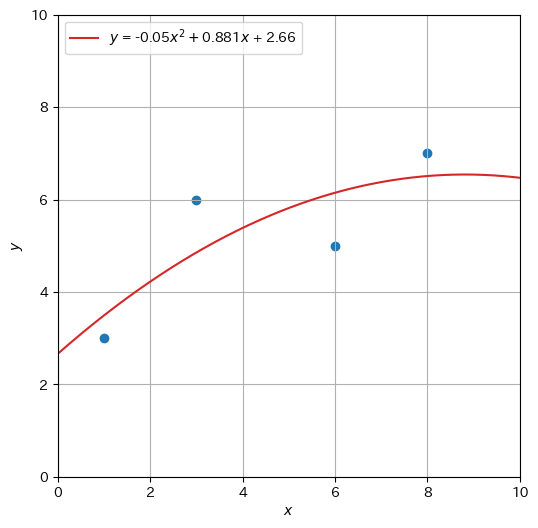

In [16]:
fig, ax = plt.subplots(dpi=100, figsize=(6, 6))
W = model2.w
ax.scatter(D[:,0], D[:,1], marker='o')
# y = 0.09 * x^3 + (-1.27) * x^2 + 5.41 * x + (-1.23)
x = np.linspace(0, 10, 500)
mlabel = '$y$ = ' + str(round(W[2][0],3)) + '$x^2 + $' + str(round(W[1][0],3)) + '$x$ + ' + str(round(W[0][0],3))
ax.plot(x,   W[2] * x ** 2 + W[1] * x +W[0], 'tab:red', ls='-', label=mlabel)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.grid()
plt.legend(loc='upper left')
plt.show()

### (4) 決定係数

In [17]:
r2 = 1 - np.var(Y - model2.predict(X_squred_examples[:, :-1])) / np.var(Y)
r2

0.6443349753694584

In [18]:
# 検算
from sklearn.metrics import r2_score

r2_2 = r2_score(Y,model2.predict(X_squred_examples[:, :-1]))
r2

0.6443349753694584

### (5) 3次関数による重回帰

In [19]:
X_cubed_examples = np.vstack([X, X**2, X**3, Y]).T
X_cubed_examples

array([[  1,   1,   1,   3],
       [  3,   9,  27,   6],
       [  6,  36, 216,   5],
       [  8,  64, 512,   7]])

In [20]:
model3 = MultipleRegression().train(X_cubed_examples)
model3.w

array([[-1.22857143],
       [ 5.40952381],
       [-1.27142857],
       [ 0.09047619]])

In [21]:
#検算
pipeline = make_pipeline(PolynomialFeatures(3), LinearRegression())
pipeline.fit(X.reshape(-1, 1), Y)
w3 = np.hstack([np.array([pipeline[-1].intercept_]), pipeline[-1].coef_[1:]])
w3

array([-1.22857143,  5.40952381, -1.27142857,  0.09047619])

# (6) 回帰曲線のプロット

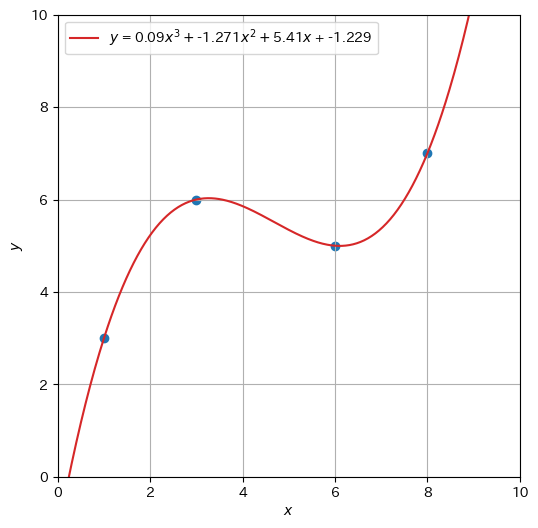

In [22]:
fig, ax = plt.subplots(dpi=100, figsize=(6, 6))
W = model3.w
ax.scatter(D[:,0], D[:,1], marker='o')
x = np.linspace(0, 10, 500)
mlabel = '$y$ = ' + str(round(W[3][0],3)) + '$x^3 + $' + str(round(W[2][0],3)) + '$x^2 + $' + str(round(W[1][0],3)) + '$x$ + ' + str(round(W[0][0],3))
ax.plot(x,   W[3] * x ** 3 + W[2] * x ** 2 + W[1] * x +W[0], 'tab:red', ls='-', label=mlabel)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.grid()
plt.legend(loc='upper left')
plt.show()

### (7)　決定係数

In [23]:
r2 = 1 - np.var(Y - model3.predict(X_cubed_examples[:, :-1])) / np.var(Y)
r2

1.0

In [24]:
# 検算
r2= r2_score(Y,model3.predict(X_cubed_examples[:, :-1]))
r2

1.0